<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_Handling_Multicollinearity_with_VIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

#### **What is Multicollinearity?**
- **Multicollinearity** occurs when **two or more independent variables** are **highly correlated** with one another in a **regression** model.

**Example:**
 - height and weight
 - household income and water consumption
 - mileage and price of a car
 - study time and leisure time

- Let me take a simple example from our everyday life to explain this. Colin loves watching television while munching on chips. The more television he watches, the more chips he eats and the happier he gets!

- Now, if we could quantify happiness and measure Colin’s happiness while he’s busy doing his favorite activity, which do you think would have a greater impact on his happiness? Having chips or watching television? That’s difficult to determine because the moment we try to measure Colin’s happiness from eating chips, he starts watching television. And the moment we try to measure his happiness from watching television, he starts eating chips.

- Eating chips and watching television are highly correlated in the case of Colin and we cannot individually determine the impact of the individual activities on his happiness. This is the multicollinearity problem!

#### **What causes Multicollinearity?**

**Multicollinearity could occur due to the following problems:**

- **1) Multicollinearity could exist because of the problems in the dataset at the time of creation. These problems could be because of poorly designed experiments, highly observational data, or the inability to manipulate the data:**

 - For example, determining the electricity consumption of a household from the household income and the number of electrical appliances. Here, we know that the number of electrical appliances in a household will increase with household income. However, this cannot be removed from the dataset

- **2) Including identical variables in the dataset:**

 - For example, including variables for **temperature in Fahrenheit and temperature in Celsius**

- **3) Inaccurate use of dummy variables can also cause a multicollinearity problem. This is called the Dummy variable trap:**

 - For example, in a dataset containing the status of marriage variable with two unique values: ‘married’, ’single’. Creating dummy variables for both of them would include redundant information. We can make do with only one variable containing 0/1 for ‘married’/’single’ status.

#### **VIF (Variable Inflation Factors)**

**VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.**

                               (or)

**VIF score of an independent variable represents how well the variable is explained by other independent variables.**

- R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. 

- So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

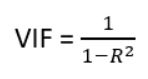

### **1) Detecting Multicollinearity using VIF**

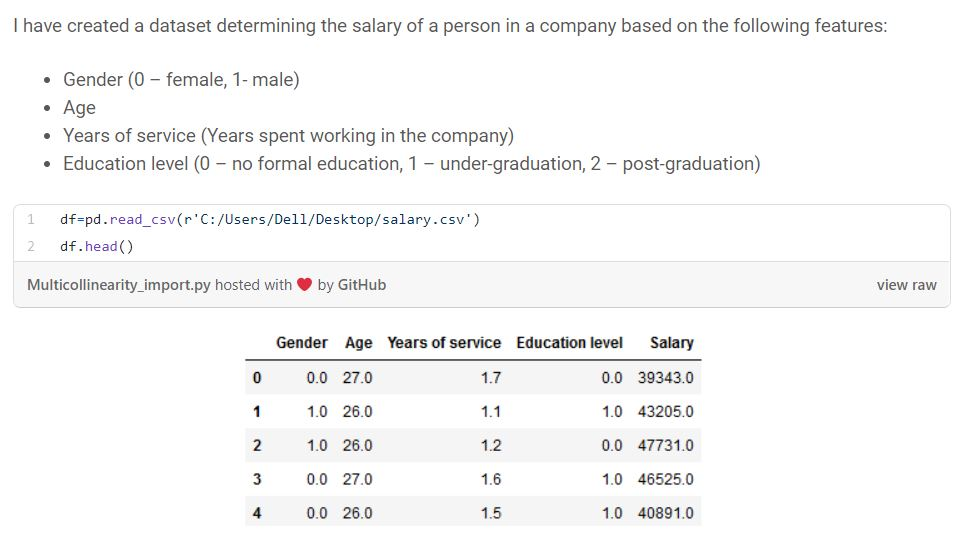

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

- VIF starts at 1 and has no upper limit

- VIF = 1, no correlation between the independent variable and the other variables

- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [ ]:
X = df.iloc[:,:-1]
calc_vif(X)

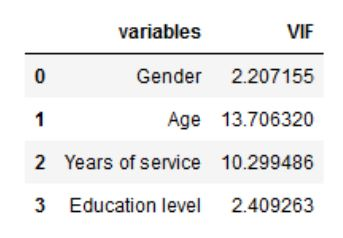

- We can see here that the **‘Age’ and ‘Years of service’ have a high VIF value,** meaning they can be predicted by other independent variables in the dataset.

- Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

#### **Fixing Multicollinearity**

##### **a) Dropping one of the correlated features**

- Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:

In [ ]:
X = df.drop(['Age','Salary'],axis=1)
calc_vif(X)

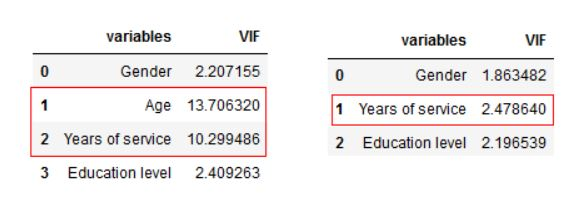

- The image on the **left** contains the **original VIF value** for variables and the one on the **right** is **after dropping the ‘Age’ variable.**

- We were able to **drop** the variable **‘Age’** from the dataset because its information was being **captured** by the **‘Years of service’** variable. This has reduced the redundancy in our dataset.

##### **b) combine the correlated variables into one and drop the others**

In [ ]:
df2 = df.copy()
df2['Age_at_joining'] = df.apply(lambda x: x['Age'] - x['Years of service'],axis=1)
X = df2.drop(['Age','Years of service','Salary'],axis=1)
calc_vif(X)

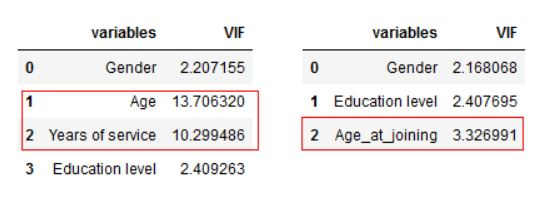

- The image on the **left** contains the **original VIF value** for variables and the one on the **right** is after **combining the ‘Age’ and ‘Years of service’ variable.**

- Combining ‘Age’ and ‘Years of experience’  into a single variable ‘Age_at_joining’ allows us to capture the information in both the variables.

------------------

### **2) diabetes**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_cleaned.csv to diabetes_cleaned.csv


In [2]:
import pandas as pd

In [3]:
diabetes = pd.read_csv("diabetes_cleaned.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,218.937760,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.189298,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,269.968908,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# assign features to X and target to Y 
X = diabetes.drop('Outcome', axis = 1)

y = diabetes["Outcome"]

In [7]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [9]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature        VIF
0               Pregnancies   3.275956
1                   Glucose  30.211580
2             BloodPressure  33.363489
3             SkinThickness  17.101940
4                   Insulin   6.476848
5                       BMI  32.175164
6  DiabetesPedigreeFunction   3.140762
7                       Age  14.375335


----------------------------------